In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df=sns.load_dataset('tips')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.shape

(244, 7)

In [9]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [13]:
df.duplicated().sum()

1

In [15]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [17]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [19]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [21]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [23]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [25]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [27]:
X=df[['tip','sex','smoker','day','time','size']]
y=df['total_bill']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [31]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()

In [33]:
X_train['sex']=le1.fit_transform(X_train['sex'])
X_train['smoker']=le2.fit_transform(X_train['smoker'])
X_train['time']=le3.fit_transform(X_train['time'])

In [35]:
X_test['sex']=le1.transform(X_test['sex'])
X_test['smoker']=le2.transform(X_test['smoker'])
X_test['time']=le3.transform(X_test['time'])

In [37]:
X_test

,tip,sex,smoker,day,time,size
162,2.00,0,0,Sun,0,3
60,3.21,1,1,Sat,0,2
61,2.00,1,1,Sat,0,2
63,3.76,1,1,Sat,0,4
69,2.09,1,1,Sat,0,2
...,...,...,...,...,...,...
201,2.01,0,1,Thur,1,2
149,2.00,1,0,Thur,1,2
175,3.11,1,1,Sun,0,2
226,2.00,0,1,Fri,1,2


In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('onehot',OneHotEncoder(drop='first'),[3])],remainder='passthrough')

In [45]:
import sys
np.set_printoptions(threshold=sys.maxsize)
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [47]:
X_test

array([[0.  , 1.  , 0.  , 2.  , 0.  , 0.  , 0.  , 3.  ],
       [1.  , 0.  , 0.  , 3.21, 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 2.  , 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 3.76, 1.  , 1.  , 0.  , 4.  ],
       [1.  , 0.  , 0.  , 2.09, 1.  , 1.  , 0.  , 2.  ],
       [0.  , 0.  , 1.  , 5.  , 1.  , 1.  , 1.  , 2.  ],
       [0.  , 1.  , 0.  , 3.51, 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 5.16, 1.  , 1.  , 0.  , 4.  ],
       [0.  , 1.  , 0.  , 5.  , 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 3.6 , 1.  , 0.  , 0.  , 3.  ],
       [0.  , 1.  , 0.  , 5.65, 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 2.5 , 0.  , 1.  , 0.  , 3.  ],
       [0.  , 0.  , 1.  , 1.44, 1.  , 0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  , 3.09, 0.  , 1.  , 0.  , 4.  ],
       [0.  , 1.  , 0.  , 2.  , 1.  , 0.  , 0.  , 4.  ],
       [0.  , 0.  , 1.  , 1.36, 0.  , 0.  , 1.  , 3.  ],
       [0.  , 0.  , 1.  , 2.  , 0.  , 0.  , 1.  , 2.  ],
       [0.  , 0.  , 1.  , 1.68,

In [49]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear

LinearRegression()

In [51]:
linear.fit(X_train,y_train)

LinearRegression()

In [53]:
print("Coefficient: ",linear.coef_)
print("Intercept: ",linear.intercept_)

Coefficient:  [ 0.15972878 -0.30692552  2.67483748  3.11298062  1.65793141  1.95269559
 -3.55416672  3.40200013]
Intercept:  0.3704921323341779


In [55]:
linear.predict(X_train)

array([16.42369407, 17.09504624, 22.82293058, 15.24924363, 19.81713574,
       21.27218495, 29.85906636, 29.1617129 , 33.72399806, 16.67316304,
       14.43986867, 25.04199808, 19.18827173, 27.95905582, 20.40501705,
       15.51287801, 19.54515689, 13.45501858, 17.26419884, 16.0501364 ,
       14.5870355 , 17.29203643, 23.0805275 , 14.13987432, 16.70415512,
       19.06167592, 13.5682341 , 23.68579017, 14.29881557, 23.11769477,
       17.17080942, 10.96463409, 26.22493071, 12.6346327 , 21.73883926,
       20.37747225, 15.89491788, 33.07428765, 20.29307181, 16.0303103 ,
       12.88337836, 17.87502055, 18.30910868, 21.29124755, 15.10489831,
       16.1317514 , 22.35771264, 13.50189473, 32.31351799, 20.45706531,
        8.99789726, 15.02328331, 26.51004407, 14.27616796, 19.58513795,
       30.82299799, 23.97480968, 18.46612985, 16.22886356, 18.25230096,
       16.1317514 , 12.62256549, 18.14139245, 14.47381999, 22.72148949,
       27.0877903 , 20.12406126, 16.43246906, 18.53722868, 45.47

In [57]:
y_pred_test=linear.predict(X_test)

In [59]:
linear.predict(X_test)

array([16.49552824, 20.93751597, 17.17080942, 29.45365557, 17.45097768,
       25.47069326, 19.45206026, 33.81182844, 24.09040139, 23.60088295,
       28.06653438, 20.47136845, 12.43578666, 25.71002715, 21.55545978,
       13.93081693, 12.5211244 , 11.5249706 , 23.11769477, 20.78186694,
       13.84869514, 17.06936832, 15.21811383, 11.36932157, 34.29640178,
       12.5211244 , 20.53282849, 22.18906683, 15.1440798 , 36.74651243,
       31.11231029, 32.92329094, 14.75145952, 16.30794983, 18.89143096,
       12.71119545, 22.82263779, 14.07951005, 23.5835495 , 27.0877903 ,
       19.24473202, 24.77562618, 10.96463409, 30.48979043, 14.47381999,
       15.12472441, 19.72785598, 14.75145952, 13.33855104, 20.12008933,
       21.69311352, 34.00738227, 21.70478629, 29.99163727,  7.04520167,
       20.12406126, 14.5049498 , 14.17905581, 20.15956361, 11.79898251,
       17.86444014])

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [63]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

37.93194999996545
4.112035507614328
6.158891945793939


In [65]:
from sklearn.metrics import r2_score

In [67]:
score=r2_score(y_test,y_pred_test)

In [69]:
print(score)

0.5519450320567811


In [71]:
1-(1-score)*(len(y_pred_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4830134985270551

In [73]:
residuals=y_test-y_pred_test
residuals

162    -0.285528
60     -0.647516
61     -3.360809
63    -11.163656
69     -2.440978
         ...    
201    -1.764950
149    -6.669056
175    12.740436
226    -1.708983
49      0.175560
Name: total_bill, Length: 61, dtype: float64

In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [98]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [100]:
X_train_scaled

array([[ 1.38013112, -0.68978725, -0.57945356, -0.88111068,  0.75999093,
         1.3473621 , -0.61313934, -0.5939887 ],
       [-0.72456884,  1.44972236, -0.57945356, -0.95273297,  0.75999093,
        -0.74219098, -0.61313934,  0.44124875],
       [-0.72456884,  1.44972236, -0.57945356,  0.36511711,  0.75999093,
        -0.74219098, -0.61313934,  0.44124875],
       [ 1.38013112, -0.68978725, -0.57945356, -0.70205497,  0.75999093,
        -0.74219098, -0.61313934, -0.5939887 ],
       [-0.72456884,  1.44972236, -0.57945356,  0.00700568,  0.75999093,
         1.3473621 , -0.61313934, -0.5939887 ],
       [-0.72456884,  1.44972236, -0.57945356,  0.72322855, -1.31580518,
         1.3473621 , -0.61313934, -0.5939887 ],
       [-0.72456884,  1.44972236, -0.57945356,  1.58269599, -1.31580518,
        -0.74219098, -0.61313934,  1.47648621],
       [-0.72456884, -0.68978725,  1.72576385,  0.72322855,  0.75999093,
         1.3473621 ,  1.63095064,  1.47648621],
       [-0.72456884, -0.68978725

Mean Absolutye Error 4.373081118303344
R2-score 0.49285639203025067


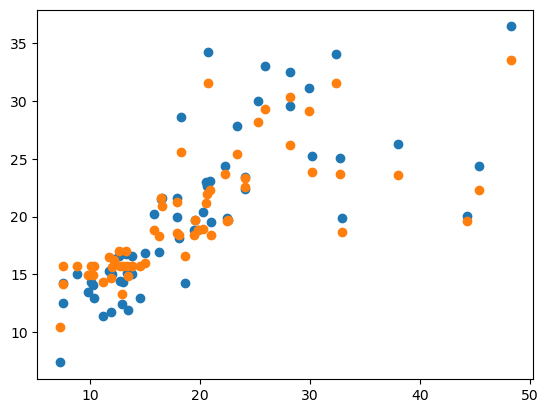

In [102]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred_lasso=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_lasso)
score=r2_score(y_test,y_pred_lasso)
print("Mean Absolutye Error",mae)
print("R2-score",score)
plt.scatter(y_test,y_pred_lasso)
plt.show()

In [104]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [106]:
lassocv.alpha_

0.14788076838496234

In [108]:
lassocv.alphas_

array([5.96997214, 5.567616  , 5.19237732, 4.84242846, 4.51606499,
       4.21169733, 3.92784302, 3.66311955, 3.41623755, 3.18599457,
       2.9712692 , 2.7710156 , 2.58425843, 2.41008806, 2.24765619,
       2.09617168, 1.95489673, 1.82314323, 1.70026948, 1.58567701,
       1.47880768, 1.379141  , 1.28619151, 1.19950651, 1.11866378,
       1.04326959, 0.97295671, 0.90738268, 0.84622813, 0.78919518,
       0.73600607, 0.68640172, 0.64014054, 0.59699721, 0.5567616 ,
       0.51923773, 0.48424285, 0.4516065 , 0.42116973, 0.3927843 ,
       0.36631195, 0.34162376, 0.31859946, 0.29712692, 0.27710156,
       0.25842584, 0.24100881, 0.22476562, 0.20961717, 0.19548967,
       0.18231432, 0.17002695, 0.1585677 , 0.14788077, 0.1379141 ,
       0.12861915, 0.11995065, 0.11186638, 0.10432696, 0.09729567,
       0.09073827, 0.08462281, 0.07891952, 0.07360061, 0.06864017,
       0.06401405, 0.05969972, 0.05567616, 0.05192377, 0.04842428,
       0.04516065, 0.04211697, 0.03927843, 0.0366312 , 0.03416

In [110]:
lassocv.mse_path_

array([[67.63962633, 86.69809497, 92.90252462, 52.4716933 , 81.58428419],
       [65.75288168, 84.75002527, 92.90252462, 49.56796801, 77.41519283],
       [63.9864863 , 79.32844655, 92.90252462, 47.08728174, 73.70787455],
       [62.03746902, 74.28634214, 91.67005288, 44.9715121 , 70.40765927],
       [60.4003691 , 69.83267678, 83.82638342, 42.33609978, 67.46662866],
       [59.03064569, 65.93497502, 75.77931522, 39.97286838, 64.84276159],
       [57.88975524, 62.52284323, 68.78598957, 37.94482487, 61.7745558 ],
       [56.9446277 , 59.53432814, 62.70907595, 36.20645965, 58.131297  ],
       [56.16652058, 56.91565621, 57.4286925 , 34.71832163, 54.91836079],
       [55.53071947, 54.61996342, 52.84075298, 33.44621419, 52.08271155],
       [55.01592853, 52.60640169, 48.85475121, 32.36044947, 49.57798412],
       [54.60381173, 50.83936115, 45.39199076, 31.43547238, 47.36366526],
       [54.27859487, 49.2877935 , 42.38404525, 30.64898058, 45.40420318],
       [54.02672013, 47.92442723, 39.7

In [112]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 4.162921668257148
R2 Score 0.5419435142964952


Mean Absolutye Error 4.115993193928103
R2-score 0.5514966853962693


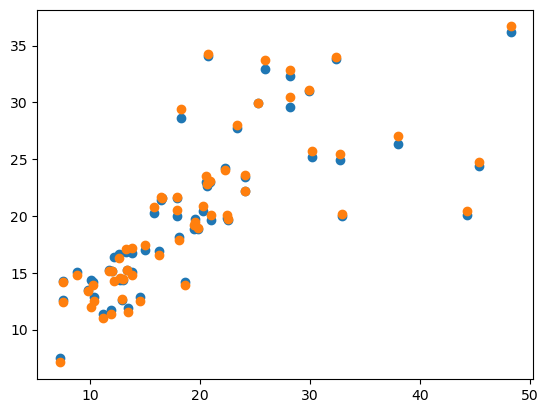

In [114]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_ridge=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_ridge)
score=r2_score(y_test,y_pred_ridge)
print("Mean Absolutye Error",mae)
print("R2-score",score)
plt.scatter(y_test,y_pred_ridge)
plt.show()

Mean absolute error 4.137674298134833
R2 Score 0.5477869260277528


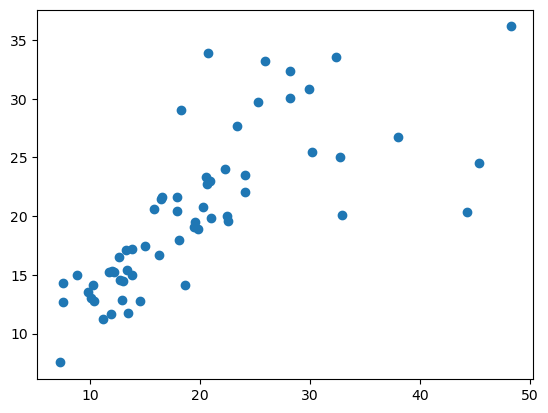

In [117]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.show()

In [119]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}